In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
plt.style.use('bmh')

In [58]:
os.chdir("path")

In [59]:
price=pd.read_csv("input/Stock market price prediction.csv")

In [60]:
price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-10-2019,2996.479980,3007.330078,2995.350098,3006.719971,3006.719971,3271620000
1,22-10-2019,3010.729980,3014.570068,2995.040039,2995.989990,2995.989990,3523890000
2,23-10-2019,2994.010010,3004.780029,2991.209961,3004.520020,3004.520020,3392870000
3,24-10-2019,3014.780029,3016.070068,3000.419922,3010.290039,3010.290039,3692600000
4,25-10-2019,3003.320068,3027.389893,3001.939941,3022.550049,3022.550049,3370370000


In [61]:
price.shape

(252, 7)

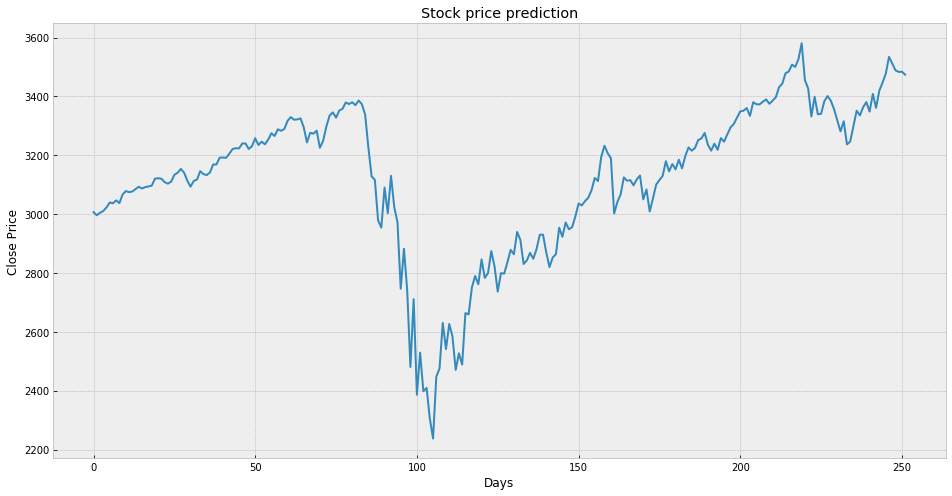

In [62]:
plt.figure(figsize=(16,8))
plt.title('Stock price prediction')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(price['Close'])
plt.show()

In [63]:
data1=price.filter(['Close'])
data1.head().round(2)


,Close
0,3006.72
1,2995.99
2,3004.52
3,3010.29
4,3022.55


In [64]:
#creat a variable to predict 'y' days out in the future
#Now the new column predicted contain the values of Close price from record 26th
future_days = 25
data1['Predicted']=data1['Close'].shift(-future_days)
data1.head(27)

,Close,Predicted
0,3006.719971,3133.639893
1,2995.989990,3140.520020
2,3004.520020,3153.629883
3,3010.290039,3140.979980
4,3022.550049,3113.870117
5,3039.419922,3093.199951
6,3036.889893,3112.760010
7,3046.770020,3117.429932
8,3037.560059,3145.909912
9,3066.909912,3135.959961


In [65]:
X=np.array(data1.drop(['Predicted'],1))[:-future_days]
print(X)

[[3006.719971]
 [2995.98999 ]
 [3004.52002 ]
 [3010.290039]
 [3022.550049]
 [3039.419922]
 [3036.889893]
 [3046.77002 ]
 [3037.560059]
 [3066.909912]
 [3078.27002 ]
 [3074.620117]
 [3076.780029]
 [3085.179932]
 [3093.080078]
 [3087.01001 ]
 [3091.840088]
 [3094.040039]
 [3096.629883]
 [3120.459961]
 [3122.030029]
 [3120.179932]
 [3108.459961]
 [3103.540039]
 [3110.290039]
 [3133.639893]
 [3140.52002 ]
 [3153.629883]
 [3140.97998 ]
 [3113.870117]
 [3093.199951]
 [3112.76001 ]
 [3117.429932]
 [3145.909912]
 [3135.959961]
 [3132.52002 ]
 [3141.629883]
 [3168.570068]
 [3168.800049]
 [3191.449951]
 [3192.52002 ]
 [3191.139893]
 [3205.370117]
 [3221.219971]
 [3224.01001 ]
 [3223.379883]
 [3239.909912]
 [3240.02002 ]
 [3221.290039]
 [3230.780029]
 [3257.850098]
 [3234.850098]
 [3246.280029]
 [3237.179932]
 [3253.050049]
 [3274.699951]
 [3265.350098]
 [3288.129883]
 [3283.149902]
 [3289.290039]
 [3316.810059]
 [3329.620117]
 [3320.790039]
 [3321.75    ]
 [3325.540039]
 [3295.469971]
 [3243.629

In [66]:
y=np.array(data1["Predicted"])[:-future_days]
print(y)

[3133.639893 3140.52002  3153.629883 3140.97998  3113.870117 3093.199951
 3112.76001  3117.429932 3145.909912 3135.959961 3132.52002  3141.629883
 3168.570068 3168.800049 3191.449951 3192.52002  3191.139893 3205.370117
 3221.219971 3224.01001  3223.379883 3239.909912 3240.02002  3221.290039
 3230.780029 3257.850098 3234.850098 3246.280029 3237.179932 3253.050049
 3274.699951 3265.350098 3288.129883 3283.149902 3289.290039 3316.810059
 3329.620117 3320.790039 3321.75     3325.540039 3295.469971 3243.629883
 3276.23999  3273.399902 3283.659912 3225.52002  3248.919922 3297.590088
 3334.689941 3345.780029 3327.709961 3352.090088 3357.75     3379.449951
 3373.939941 3380.159912 3370.290039 3386.149902 3373.22998  3337.75
 3225.889893 3128.209961 3116.389893 2978.76001  2954.219971 3090.22998
 3003.370117 3130.120117 3023.939941 2972.370117 2746.560059 2882.22998
 2741.379883 2480.639893 2711.02002  2386.129883 2529.189941 2398.100098
 2409.389893 2304.919922 2237.399902 2447.330078 2475.560

In [67]:
#Split the data into 75/25
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [68]:
#Create the model
#Creat the decision tree regressor model
tree=DecisionTreeRegressor().fit(X_train,y_train)
#create the linear regression model
lr=LinearRegression().fit(X_train,y_train)

In [69]:
x_future = data1.drop(['Predicted'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[3360.469971],
       [3333.689941],
       [3380.350098],
       [3373.429932],
       [3372.850098],
       [3381.98999 ],
       [3389.780029],
       [3374.850098],
       [3385.51001 ],
       [3397.159912],
       [3431.280029],
       [3443.620117],
       [3478.72998 ],
       [3484.550049],
       [3508.01001 ],
       [3500.310059],
       [3526.649902],
       [3580.840088],
       [3455.060059],
       [3426.959961],
       [3331.840088],
       [3398.959961],
       [3339.189941],
       [3340.969971],
       [3383.540039]])

In [70]:
#Show the model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression
lr_prediction=lr.predict(x_future)
print(lr_prediction)


[2398.100098 3511.929932 3357.01001  3319.469971 2630.070068 3315.570068
 3236.919922 3246.590088 3298.459961 3351.600098 3335.469971 3363.
 3348.419922 3348.419922 3360.969971 3360.969971 3360.969971 3446.830078
 3363.       3534.219971 3511.929932 3351.600098 2541.469971 3483.810059
 3315.570068]

[3210.37623511 3201.51827566 3216.95193195 3214.66296701 3214.47117685
 3217.49435467 3220.0710452  3215.13271155 3218.65866234 3222.51206951
 3233.79789005 3237.8795882  3249.4927844  3251.41787318 3259.17766221
 3256.63076985 3265.34312981 3283.2674738  3241.66354745 3232.36895262
 3200.90640469 3223.10746694 3203.33749606 3203.92627186 3218.00706027]


C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


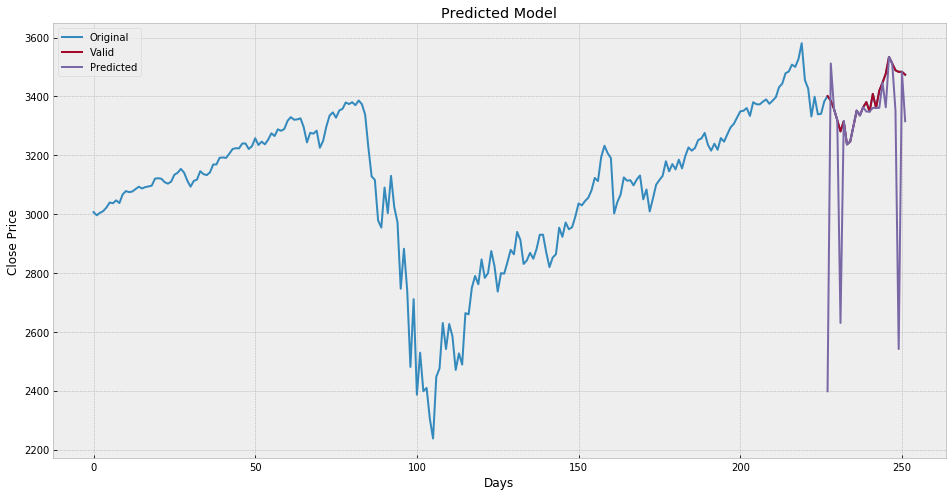

In [71]:
#Visualize the data
prediction=tree_prediction
valid=data1[X.shape[0]:]
valid['Predicted']=prediction

plt.figure(figsize=(16,8))
plt.title('Predicted Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(data1['Close'])
plt.plot(valid[['Close','Predicted']])
plt.legend(['Original','Valid',"Predicted"])
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


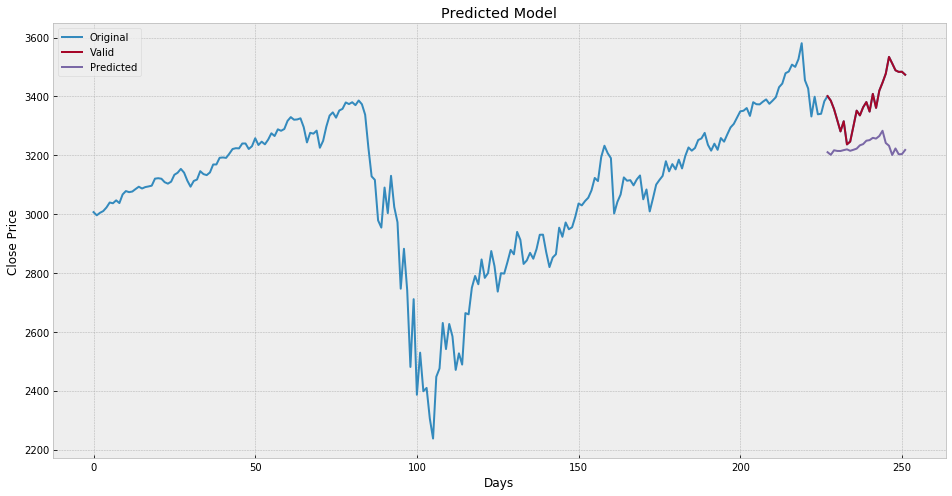

In [72]:
#Visualize the data
prediction=lr_prediction
valid=data1[X.shape[0]:]
valid['Predicted']=prediction

plt.figure(figsize=(16,8))
plt.title('Predicted Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(data1['Close'])
plt.plot(valid[['Close','Predicted']])
plt.legend(['Original','Valid',"Predicted"])
plt.show()